In [1]:
%matplotlib inline

# A simple little null analysis on the *expected* relationship between secondary structure and aSD binding energy

Some relationship is *probably* to be expected based on GC contents

In [19]:
import json
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np




# from Bio import SeqIO


# Just trying to get a sense of the A/T/G/C content of upstream regions for native genes and loading in the data for a real genome

In [68]:
gaps=(4,10)
RBS_len=6
with open('../Data/energy_files/energyRef_CCUCCU_ensemble_noneConstraint.json', 'r') as infile:
       energy_dict = json.load(infile)
        
ec_df = pd.read_csv('../Data/MVP_data/562_associated_data/ecoli.combined.tsv', sep='\t', index_col=0)
ec_df_indices = list(ec_df.index)

In [69]:
total_nts = ec_df['upstream_sequence'].str.len().sum()
for nt in ['A', 'T', 'G', 'C']:
    print(nt, ec_df['upstream_sequence'].str.count(nt).sum()/total_nts)

A 0.3184646962233169
T 0.25085385878489325
G 0.24104269293924466
C 0.18963875205254516


**This takes a little while so I only am running once (thus commenting to prevent screwing it up) and saving the file and reading it back in later**

Basically I am randomly generating a 30 nucleotide sequence with A/T/G/C ratios empirically determined above and then pairing it with a random coding sequence. 

In [70]:
# ss_list = []
# rbs_list = []
# for i in range(200000):
# #     utr_str = ''.join(np.random.choice(['A', 'U', 'G', 'C'], p=[0.25, 0.25, 0.25, 0.25], size=30))
#     utr_str = ''.join(np.random.choice(['A', 'U', 'G', 'C'], p=[0.3185, 0.2509, 0.2410, 0.1896], size=30))
#     cds_seq = ec_df.iloc[np.random.choice(ec_df_indices)]['coding_sequence']
#     if len(cds_seq) > 30:
#         combined = utr_str + cds_seq[:30]
#         assert len(combined) == 60
#         rna_out = call_RNAfold(combined)
#         e1, e2 = get_energy_RNAfold(rna_out)
#         ss_list.append(e2)
        
#         ###Calculate the energy for the indicated gap offsets
#         energy_list = []
#         for gap in range(gaps[0],gaps[1]+1):
#              energy_list.append(energy_dict[utr_str[-gap - RBS_len: -gap]])

#         rbs_list.append(min(energy_list))
        
        
# random_df = pd.DataFrame(zip(ss_list, rbs_list), columns=['secondary_structure', 'RBS_energy'])
# print(random_df.shape)
# random_df.to_csv('../Data/562_associated_data/randomdata.tsv', sep='\t')

In [71]:
random_df = pd.read_csv('../Data/MVP_data/562_associated_data/randomdata.tsv', sep='\t', index_col=0)
print(random_df.shape)
random_df.head()

(200000, 2)


,secondary_structure,RBS_energy
0,-13.36,-0.56
1,-15.99,-0.55
2,-12.12,-3.54
3,-4.07,-0.01
4,-10.99,-2.50


# Compare the random correlation with what is observed in E. coli

In [72]:
print('#####Random')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=random_df).fit(disp=0)
print(fitted.summary())
print()
print('#####E. coli')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=ec_df).fit(disp=0)
print(fitted.summary())

#####Random
                             OLS Regression Results                            
Dep. Variable:     secondary_structure   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     5371.
Date:                 Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                         18:49:16   Log-Likelihood:            -5.3084e+05
No. Observations:               200000   AIC:                         1.062e+06
Df Residuals:                   199998   BIC:                         1.062e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9230      0.0

**But how valid is a direct comparison? What do the values look like?**

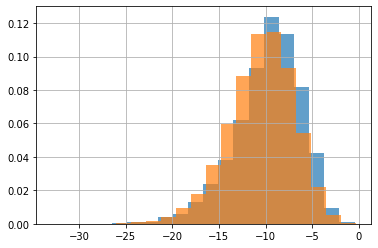

In [79]:
ec_df['secondary_structure'].hist(density=True, bins=20, alpha=0.7)
random_df['secondary_structure'].hist(density=True, bins=20, alpha=0.7)

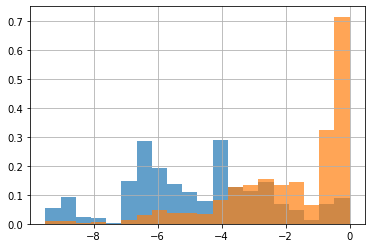

In [78]:
ec_df['RBS_energy'].hist(density=True, bins=20, alpha=0.7)
random_df['RBS_energy'].hist(density=True, bins=20, alpha=0.7)

# Sub-sample random data so that it looks like real data

**First, by controlling for rbs energy**

In [80]:
random_indices = []
for index in ec_df.index[:]:
    rbs = ec_df.loc[index]['RBS_energy']
    temp_df = random_df[random_df['RBS_energy'] == rbs]
    if temp_df.shape[0]>0:
        choice = np.random.choice(temp_df.index)
        random_indices.append(choice)

In [81]:
subset_random_df = random_df.loc[random_indices]
print(subset_random_df.shape)
subset_random_df.head()

(4060, 2)


,secondary_structure,RBS_energy
121613,-11.23,-2.45
131251,-12.54,-5.42
88558,-6.40,-6.51
38159,-6.84,-3.40
160006,-8.87,-6.51


In [82]:
print('#####Random')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=subset_random_df).fit(disp=0)
print(fitted.summary())
print()
print('#####E. coli')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=ec_df).fit(disp=0)
print(fitted.summary())

#####Random
                             OLS Regression Results                            
Dep. Variable:     secondary_structure   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     53.31
Date:                 Mon, 08 Jun 2020   Prob (F-statistic):           3.41e-13
Time:                         18:52:20   Log-Likelihood:                -10737.
No. Observations:                 4060   AIC:                         2.148e+04
Df Residuals:                     4058   BIC:                         2.149e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1760      0.1

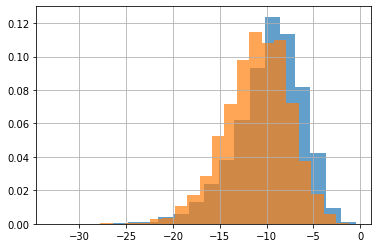

In [83]:
ec_df['secondary_structure'].hist(density=True, bins=20, alpha=0.7)
subset_random_df['secondary_structure'].hist(density=True, bins=20, alpha=0.7)

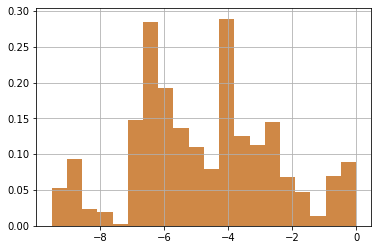

In [85]:
ec_df['RBS_energy'].hist(density=True, bins=20, alpha=0.7)
subset_random_df['RBS_energy'].hist(density=True, bins=20, alpha=0.7)

**Secondary structure is shifted a bit...**

In [111]:
assert len(list(ec_df['genome_id'].value_counts().keys())) == 1
host_name = ec_df['genome_id'].value_counts().keys()[0]
#
concat_df = pd.concat((ec_df, subset_random_df), ignore_index=True, sort=False)
concat_df['binary_predictor'] = 1
concat_df.at[concat_df[concat_df['genome_id'] == host_name].index, 'binary_predictor'] = 0
print(concat_df.shape)
print(concat_df['binary_predictor'].value_counts())

# concat_df['RBS_energy'] += 9.51

(8120, 26)
1    4060
0    4060
Name: binary_predictor, dtype: int64


In [112]:
###Random intercept 
# fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
#                  data=concat_df, groups=concat_df['binary_predictor']).fit(disp=0)

##Random slope
fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
                 data=concat_df, re_formula='0+RBS_energy', groups=concat_df['binary_predictor'])\
            .fit(disp=0)

###Random intercept and random slope
# fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
#                  data=concat_df, re_formula='RBS_energy', groups=concat_df['binary_predictor']).fit(disp=0)

print(fitted.summary())
print(fitted.random_effects)

/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: secondary_structure
No. Observations: 8120    Method:             REML               
No. Groups:       2       Scale:              12.1605            
Min. group size:  4060    Log-Likelihood:     -21672.6579        
Max. group size:  4060    Converged:          No                 
Mean group size:  4060.0                                         
------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept         -8.940     0.091  -97.775  0.000  -9.120  -8.761
RBS_energy         0.306     0.311    0.983  0.326  -0.304   0.916
RBS_energy Var     0.193                                          

{0: RBS_energy   -0.082285
dtype: float64, 1: RBS_energy    0.082285
dtype: float64}


/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2118: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2130: ConvergenceWarning: Gradient optimization failed, |grad| = 7.377030
  warnings.warn(msg, ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/

**Or we could force the secondary structures to look normal-ish and see how the relationship looks**

In [47]:
random_indices = []
for index in ec_df.index[:]:
    struct = ec_df.loc[index]['secondary_structure']
    temp_df = random_df[random_df['secondary_structure'] == struct]
    if temp_df.shape[0]>0:
        choice = np.random.choice(temp_df.index)
        random_indices.append(choice)
print(len(random_indices))

4049


In [49]:
subset_random_df = random_df.loc[random_indices]
print(subset_random_df.shape)
subset_random_df.head()

(4049, 2)


,secondary_structure,RBS_energy
151662,-1.56,-1.58
102732,-9.78,-6.11
127260,-14.65,-1.07
118116,-4.86,-0.41
180213,-7.80,-0.42


In [50]:
print('#####Random')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=subset_random_df).fit(disp=0)
print(fitted.summary())
print()
print('#####E. coli')
fitted = smf.ols('secondary_structure ~ RBS_energy',\
                 data=ec_df).fit(disp=0)
print(fitted.summary())

#####Random
                             OLS Regression Results                            
Dep. Variable:     secondary_structure   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     128.6
Date:                 Mon, 08 Jun 2020   Prob (F-statistic):           2.25e-29
Time:                         18:01:31   Log-Likelihood:                -10791.
No. Observations:                 4049   AIC:                         2.159e+04
Df Residuals:                     4047   BIC:                         2.160e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1609      0.0

**Using a mixed-lm to fix the intercept and/or slope**

In [53]:
assert len(list(ec_df['genome_id'].value_counts().keys())) == 1
host_name = ec_df['genome_id'].value_counts().keys()[0]
#
concat_df = pd.concat((ec_df, subset_random_df), ignore_index=True, sort=False)
concat_df['binary_predictor'] = 1
concat_df.at[concat_df[concat_df['genome_id'] == host_name].index, 'binary_predictor'] = 0
print(concat_df.shape)
print(concat_df['binary_predictor'].value_counts())

concat_df['RBS_energy'] += 9.51

(8109, 26)
0    4060
1    4049
Name: binary_predictor, dtype: int64


In [61]:
###Random intercept 
fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
                 data=concat_df, groups=concat_df['binary_predictor']).fit(disp=0)

###Random slope
# fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
#                  data=concat_df, re_formula='0+RBS_energy', groups=concat_df['binary_predictor']).fit(disp=0)

###Random intercept and random slope
# fitted = smf.mixedlm('secondary_structure ~ RBS_energy',\
#                  data=concat_df, re_formula='RBS_energy', groups=concat_df['binary_predictor']).fit(disp=0)

print(fitted.summary())
print(fitted.random_effects)

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: secondary_structure
No. Observations: 8109    Method:             REML               
No. Groups:       2       Scale:              12.1466            
Min. group size:  4049    Log-Likelihood:     -21637.5224        
Max. group size:  4060    Converged:          Yes                
Mean group size:  4054.5                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      -12.180     0.565  -21.550  0.000  -13.288  -11.073
RBS_energy       0.388     0.019   20.776  0.000    0.351    0.425
Group Var        0.609     0.246                                  

{0: Group    0.552557
dtype: float64, 1: Group   -0.552557
dtype: float64}


In [58]:
fitted.random_effects

{0: Group    0.552557
 dtype: float64,
 1: Group   -0.552557
 dtype: float64}

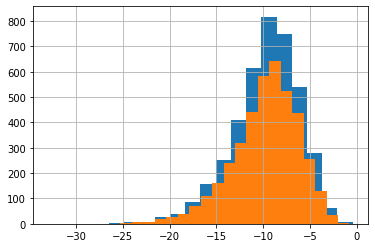

In [66]:
ec_df['secondary_structure'].hist(bins=20)
subset_random_df['secondary_structure'].hist(bins=20)

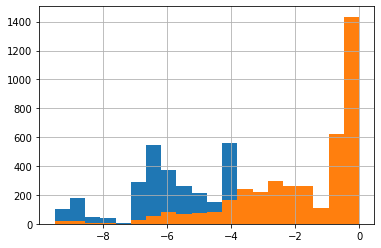

In [67]:
ec_df['RBS_energy'].hist(bins=20)
subset_random_df['RBS_energy'].hist(bins=20)